In [1]:
import numpy as np
import networkx as nx

In [2]:
import sys
sys.path.append('.')
from genus_utils.main import calc_genus
from graphs import laplacian_matrix, compute_eigenvalues, load_graph

In [3]:
def conformal_bound_lhs(G, k=None, C_inv=np.pi / 512):
    k = k or G.number_of_nodes()
    degrees = [G.degree(i) for i in range(G.number_of_nodes())]
    max_deg = max(degrees)
    lap = laplacian_matrix(G)
    eig = compute_eigenvalues(lap)[0]
    num_edges = G.number_of_edges()
    return C_inv * eig[k - 1] / max_deg * num_edges - k

In [4]:
def delta_g(G, genus_fn=calc_genus, k=None, C_inv=np.pi / 512):
    return genus_fn(G) - conformal_bound_lhs(G, k, C_inv)

In [5]:
delta_gs = []
lhs = []
genera = []
for n in range(3, 410):
    G = nx.complete_graph(n)
    g = np.ceil((n-3)*(n-4)/12)
    lhs.append(conformal_bound_lhs(G))
    delta_gs.append(g - lhs[-1])
    genera.append(g)

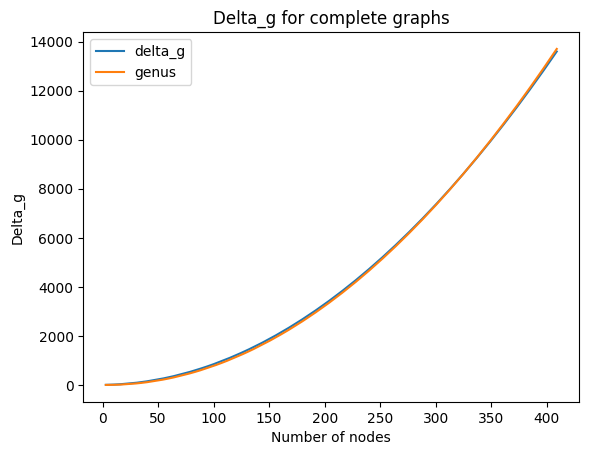

In [6]:
import matplotlib.pyplot as plt
plt.plot(range(3, 410), delta_gs)
plt.plot(range(3, 410), genera)
plt.legend(['delta_g', 'genus'])
plt.xlabel('Number of nodes')
plt.ylabel('Delta_g')
plt.title('Delta_g for complete graphs')
plt.show()

/var/folders/gz/pp4ldsnj0tjbngm2gygkp8qc0000gn/T/ipykernel_84397/765511397.py:1: RuntimeWarning: invalid value encountered in log
  plt.plot(range(3, 410), [np.log((d - n) / n) for d, n in zip(delta_gs, range(3, 410))])


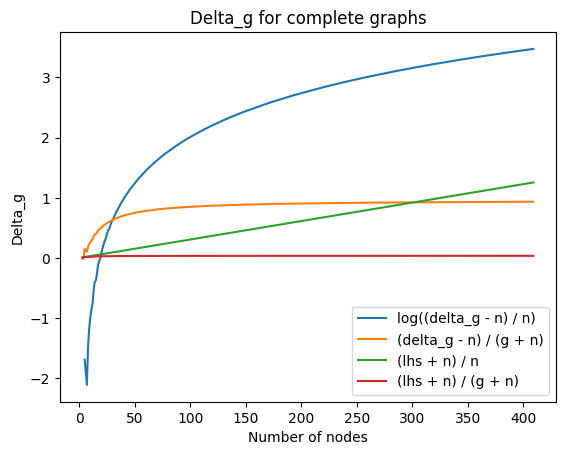

In [7]:
plt.plot(range(3, 410), [np.log((d - n) / n) for d, n in zip(delta_gs, range(3, 410))])
plt.plot(range(3, 410), [(d - n) / (g + n) for d, g, n in zip(delta_gs, genera, range(3, 410))])
plt.plot(range(3, 410), [(l + n) / n for l, n in zip(lhs, range(3, 410))])
plt.plot(range(3, 410), [(l + n) / (g + n) for l, g, n in zip(lhs, genera, range(3, 410))])
plt.legend(['log((delta_g - n) / n)', '(delta_g - n) / (g + n)', '(lhs + n) / n', '(lhs + n) / (g + n)'])
plt.xlabel('Number of nodes')
plt.ylabel('Delta_g')
plt.title('Delta_g for complete graphs')
plt.show()

In [8]:
delta_gs = []
genera = []
lhs = []
for n in range(3, 410):
    G = nx.cycle_graph(n)
    g = 0
    lhs.append(conformal_bound_lhs(G))
    delta_gs.append(g - lhs[-1])
    genera.append(g)

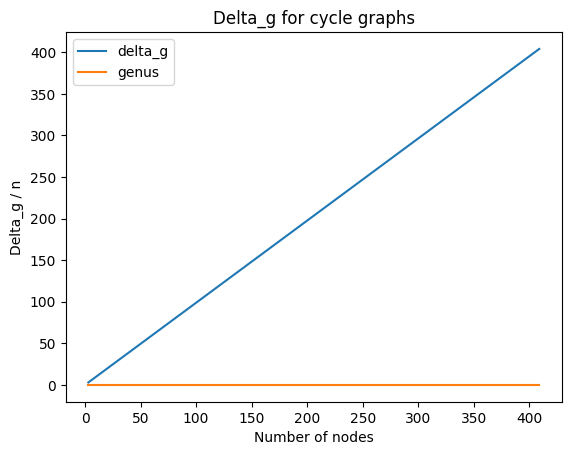

In [9]:
plt.plot(range(3, 410), delta_gs)
plt.plot(range(3, 410), genera)
plt.legend(['delta_g', 'genus'])
plt.xlabel('Number of nodes')
plt.ylabel('Delta_g / n')
plt.title('Delta_g for cycle graphs')
plt.show()

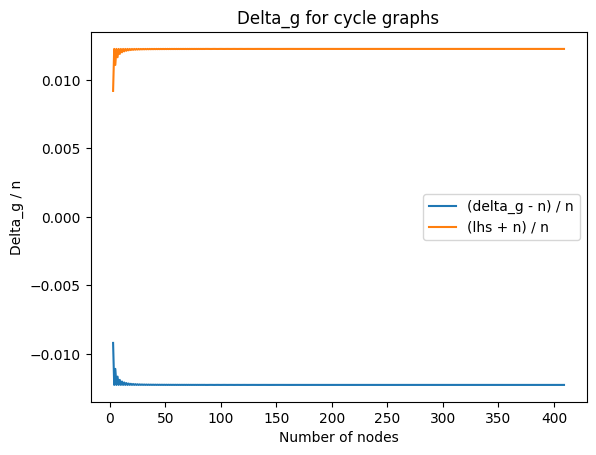

In [10]:
plt.plot(range(3, 410), [(delta_gs[i - 3] - i) / i for i in range(3, 410)])
plt.plot(range(3, 410), [(lhs[i - 3] + i) / i for i in range(3, 410)])
plt.legend(['(delta_g - n) / n', '(lhs + n) / n'])
plt.xlabel('Number of nodes')
plt.ylabel('Delta_g / n')
plt.title('Delta_g for cycle graphs')
plt.show()

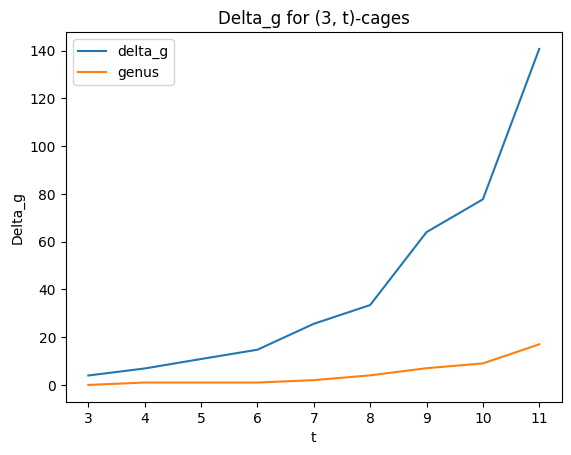

In [11]:
cages = [
    (3, 0, load_graph('adjacency_lists/3-3-cage.txt')),
    (4, 1, load_graph('adjacency_lists/3-4-cage.txt')),
    (5, 1, load_graph('adjacency_lists/3-5-cage.txt')),
    (6, 1, load_graph('adjacency_lists/3-6-cage.txt')),
    (7, 2, load_graph('adjacency_lists/3-7-cage.txt')),
    (8, 4, load_graph('adjacency_lists/3-8-cage.txt')),
    (9, 7, load_graph('adjacency_lists/3-9-cage1.txt')),
    (10, 9, load_graph('adjacency_lists/3-10-cage1.txt')),
    (11, 17, load_graph('adjacency_lists/3-12-cage.txt')),
]
plt.plot([c[0] for c in cages], [delta_g(G, lambda G: g) for _, g, G in cages])
plt.plot([c[0] for c in cages], [g for _, g, _ in cages])
plt.legend(['delta_g', 'genus'])
plt.xlabel('t')
plt.ylabel('Delta_g')
plt.title('Delta_g for (3, t)-cages')
plt.show()

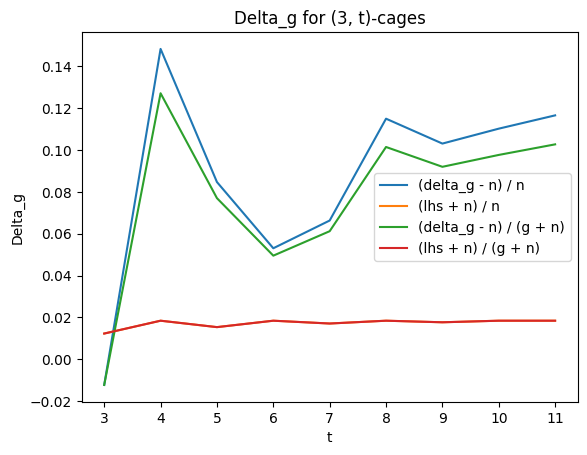

In [12]:
plt.plot([c[0] for c in cages], [(delta_g(G, lambda G: g) - G.number_of_nodes()) / G.number_of_nodes() for _, g, G in cages])
plt.plot([c[0] for c in cages], [(conformal_bound_lhs(G) + G.number_of_nodes()) / G.number_of_nodes() for _, _, G in cages])
plt.plot([c[0] for c in cages], [(delta_g(G, lambda G: g) - G.number_of_nodes()) / (g + G.number_of_nodes()) for _, g, G in cages])
plt.plot([c[0] for c in cages], [(conformal_bound_lhs(G) + G.number_of_nodes()) / (g + G.number_of_nodes()) for _, _, G in cages])
plt.legend(['(delta_g - n) / n', '(lhs + n) / n', '(delta_g - n) / (g + n)', '(lhs + n) / (g + n)'])
plt.xlabel('t')
plt.ylabel('Delta_g')
plt.title('Delta_g for (3, t)-cages')
plt.show()

In [13]:
def erdos_renyi_graph(n, p):
    G = nx.erdos_renyi_graph(n, p)
    return G

TRIALS = 10
P = 0.3
N_MIN = 3
N_MAX = 19

means = []
stds = []
delta_gs_all = []
genera_all = []
genera_means = []
genera_stds = []
for n in range(N_MIN, N_MAX):
    print(f"n = {n}")
    delta_gs = []
    genera = []
    for _ in range(TRIALS):
        G = erdos_renyi_graph(n, P)
        while not nx.is_connected(G):
            G = erdos_renyi_graph(n, P)
        genus = calc_genus(G)
        delta_gs.append(delta_g(G, lambda G: genus))
        genera.append(genus)
    means.append(np.mean(delta_gs))
    stds.append(np.std(delta_gs))
    delta_gs_all.append(delta_gs)
    genera_all.append(genera)
    genera_means.append(np.mean(genera))
    genera_stds.append(np.std(genera))

n = 3
n = 4
n = 5
n = 6
n = 7
n = 8
n = 9
n = 10
n = 11
n = 12
n = 13
n = 14
n = 15
n = 16
n = 17
n = 18


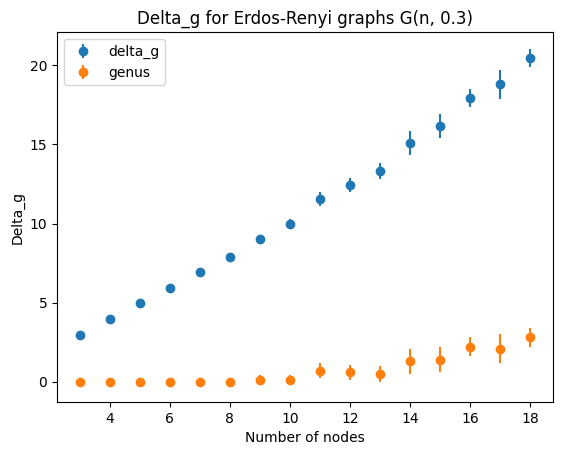

In [14]:
# Plot the mean and standard deviation of delta_g for Erdos-Renyi graphs.
plt.errorbar(range(N_MIN, N_MAX), means, yerr=stds, fmt='o')
plt.errorbar(range(N_MIN, N_MAX), genera_means, yerr=genera_stds, fmt='o')
plt.legend(['delta_g', 'genus'])
plt.xlabel('Number of nodes')
plt.ylabel('Delta_g')
plt.title(f'Delta_g for Erdos-Renyi graphs G(n, {P})')
plt.show()

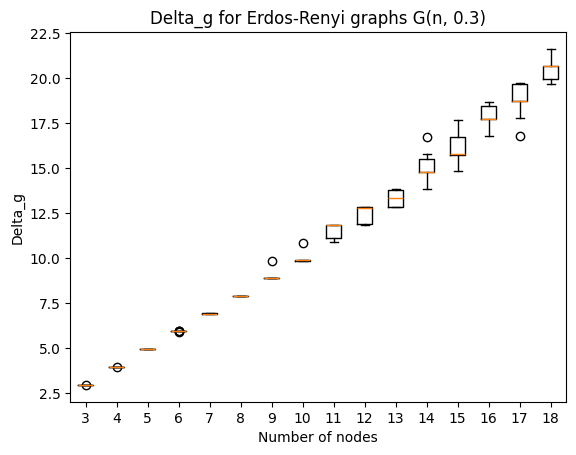

In [15]:
# Plot as boxplots for each n.
plt.boxplot(delta_gs_all, positions=range(N_MIN, N_MAX))
plt.xlabel('Number of nodes')
plt.ylabel('Delta_g')
plt.title(f'Delta_g for Erdos-Renyi graphs G(n, {P})')
plt.show()

In [16]:
TRIALS = 10
P = 0.8
N_MIN = 3
N_MAX = 12

delta_g_over_n_means = []
delta_g_over_n_stds = []
lhs_over_n_means = []
lhs_over_n_stds = []
delta_g_over_g_plus_n_means = []
delta_g_over_g_plus_n_stds = []
lhs_over_g_plus_n_means = []
lhs_over_g_plus_n_stds = []
for n in range(N_MIN, N_MAX):
    print(f"n = {n}")
    delta_gs_over_n = []
    delta_gs_over_g_plus_n = []
    lhs_over_n = []
    lhs_over_g_plus_n = []
    for _ in range(TRIALS):
        G = erdos_renyi_graph(n, P)
        while not nx.is_connected(G):
            G = erdos_renyi_graph(n, P)
        genus = calc_genus(G)
        lhs = conformal_bound_lhs(G)
        del_g = genus - lhs
        delta_gs_over_n.append(del_g / n)
        delta_gs_over_g_plus_n.append(del_g / (genus + n))
        lhs_over_n.append(lhs / n)
        lhs_over_g_plus_n.append(lhs / (genus + n))
    delta_g_over_n_means.append(np.mean(delta_gs_over_n))
    delta_g_over_n_stds.append(np.std(delta_gs_over_n))
    lhs_over_n_means.append(np.mean(lhs_over_n))
    lhs_over_n_stds.append(np.std(lhs_over_n))
    delta_g_over_g_plus_n_means.append(np.mean(delta_gs_over_g_plus_n))
    delta_g_over_g_plus_n_stds.append(np.std(delta_gs_over_g_plus_n))
    lhs_over_g_plus_n_means.append(np.mean(lhs_over_g_plus_n))
    lhs_over_g_plus_n_stds.append(np.std(lhs_over_g_plus_n))

n = 3
n = 4
n = 5
n = 6
n = 7
n = 8
n = 9
n = 10
n = 11


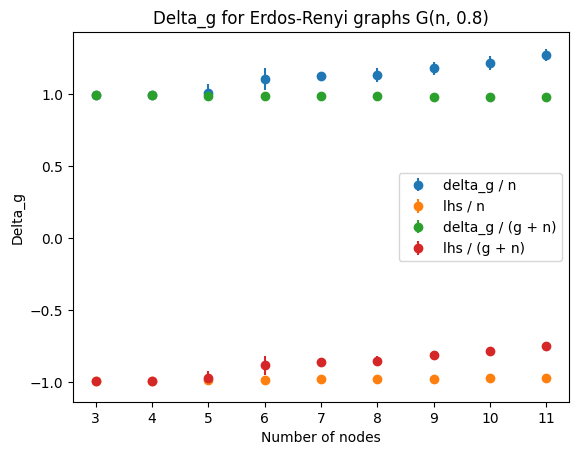

In [17]:
plt.errorbar(range(N_MIN, N_MAX), delta_g_over_n_means, yerr=delta_g_over_n_stds, fmt='o')
plt.errorbar(range(N_MIN, N_MAX), lhs_over_n_means, yerr=lhs_over_n_stds, fmt='o')
plt.errorbar(range(N_MIN, N_MAX), delta_g_over_g_plus_n_means, yerr=delta_g_over_g_plus_n_stds, fmt='o')
plt.errorbar(range(N_MIN, N_MAX), lhs_over_g_plus_n_means, yerr=lhs_over_g_plus_n_stds, fmt='o')
plt.legend(['delta_g / n', 'lhs / n', 'delta_g / (g + n)', 'lhs / (g + n)'])
plt.xlabel('Number of nodes')
plt.ylabel('Delta_g')
plt.title(f'Delta_g for Erdos-Renyi graphs G(n, {P})')
plt.show()